In [21]:
import os
import pickle
import shutil 

import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as trans
from skimage.io import imread
from sklearn.model_selection import train_test_split

from data_downloader import download_and_extract, test_train_split

import warnings
warnings.filterwarnings("ignore")

# Download and prepare LIDC_IDRI raw dataset

In [22]:
# Clear out old data
shutil.rmtree('data/prepared')

In [23]:
download_and_extract(100)

Preparing...100/100
Complete.


# Split into test and train

In [24]:
# # Clear out old data
shutil.rmtree('data/train')
shutil.rmtree('data/test')

In [25]:
test_train_split('data/prepared', 'data/train', 'data/test')

# Inspect prepared data

### Training data

1
55


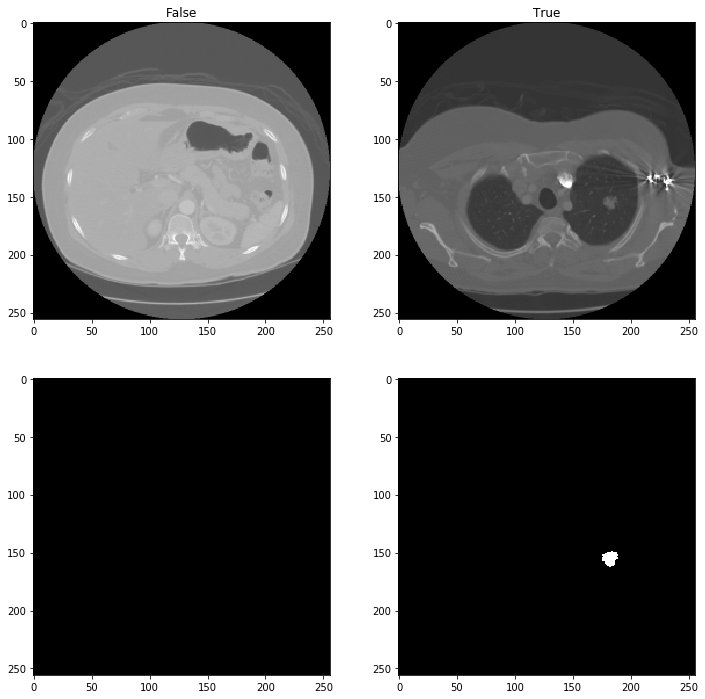

In [30]:
train_idx_1 = np.random.randint(len(os.listdir('data/train/image')))
train_idx_2 = np.random.randint(len(os.listdir('data/train/image')))

train_img_1 = imread(f'data/train/image/{train_idx_1}.png') 
train_img_2 = imread(f'data/train/image/{train_idx_2}.png') 
train_mask_1 = imread(f'data/train/mask/{train_idx_1}.png') 
train_mask_2 = imread(f'data/train/mask/{train_idx_2}.png') 
train_label_1 = pickle.load(open(f"data/train/label/{train_idx_1}.pkl", "rb" ))
train_label_2 = pickle.load(open(f"data/train/label/{train_idx_2}.pkl", "rb" ))

print(train_idx_1)
print(train_idx_2)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0][0].imshow(np.array(train_img_1), cmap='gray')
axs[0][1].imshow(np.array(train_img_2), cmap='gray')
axs[1][0].imshow(np.array(train_mask_1), cmap='gray')
axs[1][1].imshow(np.array(train_mask_2), cmap='gray')
axs[0][0].set_title(train_label_1)
axs[0][1].set_title(train_label_2)
plt.show()


### Test data

45
25


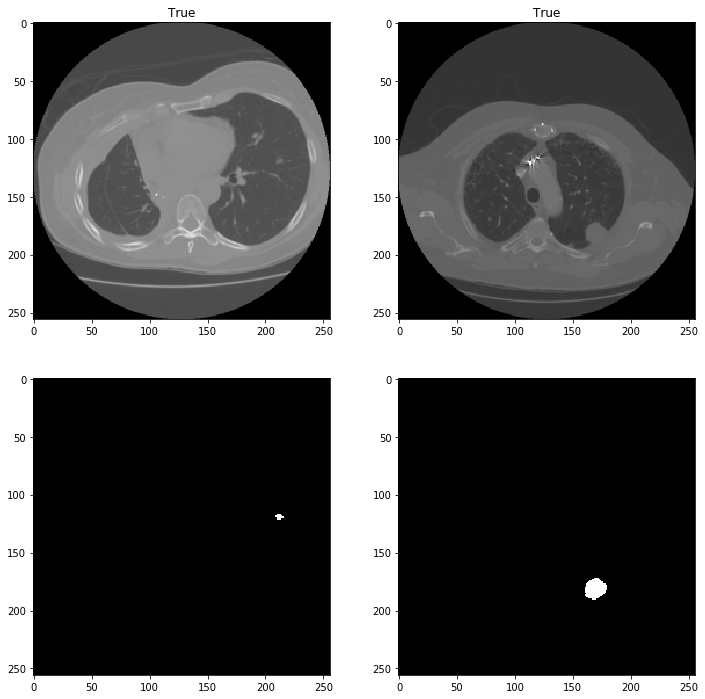

In [33]:
test_idx_1 = np.random.randint(len(os.listdir('data/test/image')))
test_idx_2 = np.random.randint(len(os.listdir('data/test/image')))

test_img_1 = imread(f'data/test/image/{test_idx_1}.png') 
test_img_2 = imread(f'data/test/image/{test_idx_2}.png') 
test_mask_1 = imread(f'data/test/mask/{test_idx_1}.png') 
test_mask_2 = imread(f'data/test/mask/{test_idx_2}.png') 
test_label_1 = pickle.load(open(f"data/test/label/{test_idx_1}.pkl", "rb" ))
test_label_2 = pickle.load(open(f"data/test/label/{test_idx_2}.pkl", "rb" ))

print(test_idx_1)
print(test_idx_2)

fig, axs = plt.subplots(2, 2, figsize=(12, 12))
axs[0][0].imshow(np.array(test_img_1), cmap='gray')
axs[0][1].imshow(np.array(test_img_2), cmap='gray')
axs[1][0].imshow(np.array(test_mask_1), cmap='gray')
axs[1][1].imshow(np.array(test_mask_2), cmap='gray')

axs[0][0].set_title(test_label_1)
axs[0][1].set_title(test_label_2)
plt.show()

# Format for genki

In [34]:
ntrain = len(os.listdir('data/train/image/'))
ntest = len(os.listdir('data/test/image/'))

train_idxs, val_idxs = train_test_split(range(ntrain), test_size=.1)
test_idxs = range(ntest)

train_dataset = np.array([imread(f"data/train/image/{i}.png") for i in train_idxs])
train_masks = np.array([imread(f"data/train/mask/{i}.png") for i in train_idxs])
train_labels = np.array([pickle.load(open(f"data/train/label/{i}.pkl", "rb" )) for i in train_idxs])

val_dataset = np.array([imread(f"data/train/image/{i}.png") for i in val_idxs])
val_masks = np.array([imread(f"data/train/mask/{i}.png") for i in val_idxs])
val_labels = np.array([pickle.load(open(f"data/train/label/{i}.pkl", "rb" )) for i in val_idxs])

test_dataset = np.array([imread(f"data/test/image/{i}.png") for i in test_idxs])
test_masks = np.array([imread(f"data/test/mask/{i}.png") for i in test_idxs])
test_labels = np.array([pickle.load(open(f"data/test/label/{i}.pkl", "rb" )) for i in test_idxs])

In [35]:
print(train_dataset.shape, train_labels.shape)
print(val_dataset.shape, val_labels.shape)
print(test_dataset.shape, test_labels.shape)

(224, 256, 256) (224,)
(25, 256, 256) (25,)
(63, 256, 256) (63,)


In [36]:
data = {
    'train_dataset': train_dataset,
    'train_masks': train_masks,
    'train_labels': train_labels,
    'valid_dataset': val_dataset,
    'val_masks': val_masks,
    'valid_labels': val_labels,
    'test_dataset': test_dataset,
    'test_masks': test_masks,
    'test_labels': test_labels
}

In [37]:
pickle.dump(data, open('data.pkl', 'wb'))